In [1]:
%load_ext cudf.pandas

# <center>**<u>Sampling with Python</u>**</center>

In [2]:
# IMPORTS HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cudf
import random
import pyarrow as pa
import os


In [3]:
attrition_df = cudf.read_parquet('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/sampling/attrition.parquet')

## **Proportional Stratified Sampling**

---
- If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population
- Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population
- It is equivalent to performing a simple random sample on each subgroup

---

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- First, extract the proportion of employees by their `Education` levels from `attrition_df`
- Print the results

In [11]:
ed_pop_counts = attrition_df['Education'].value_counts(normalize=True)
print(ed_pop_counts)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64


---
- Use proportional stratified sampling on the variable `ed_pop_counts` to sample 42% of each group in `Education`
- Set the seed to `2025`
- Print the results

In [13]:
attrition_strat = attrition_df.groupby('Education').sample(frac=0.42, random_state=2025)
print(attrition_strat)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1205   40        0.0      Travel_Rarely        884  Research_Development   
31     26        1.0      Travel_Rarely        471  Research_Development   
478    30        1.0      Travel_Rarely        138  Research_Development   
22     27        0.0         Non-Travel       1450  Research_Development   
104    20        1.0  Travel_Frequently        769                 Sales   
...   ...        ...                ...        ...                   ...   
1195   36        1.0      Travel_Rarely        885  Research_Development   
560    38        0.0      Travel_Rarely        243                 Sales   
1129   54        0.0      Travel_Rarely        397       Human_Resources   
1402   56        0.0      Travel_Rarely        718  Research_Development   
1180   36        0.0      Travel_Rarely        530                 Sales   

      DistanceFromHome Education    EducationField EnvironmentSatisfaction  \
1205     

---
- Now retrieve the proportion of employees from each group within `Education` from `attrition_strat`
- Print the results
- Underneath these results print the results from the `ed_pop_counts` vairable from above, so we can compare how close our sample is to the actual population proportions

In [15]:
attrition_strat_counts = attrition_strat['Education'].value_counts(normalize=True)
print(attrition_strat_counts)
#this print call below is just to create a clear demarcation between the stratified sample proportions and the full population proportions
print('--------------')
print(ed_pop_counts)

Education
Bachelor         0.389610
Master           0.271104
College          0.191558
Below_College    0.115260
Doctor           0.032468
Name: proportion, dtype: float64
--------------
Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64


- Everything seems to be in order
 - Great job!

---

## **Equal Counts Stratified Sampling**

---
- If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis,
- then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data

---

###  &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- Use equal counts stratified sampling on `attrition_df` to get exactly 33 employees from each group within `Education`
- Set the seed to `2025`
- Print the results

In [16]:
attrition_equal = attrition_df.groupby('Education').sample(n=33, random_state=2025)
print(attrition_equal)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1205   40        0.0      Travel_Rarely        884  Research_Development   
31     26        1.0      Travel_Rarely        471  Research_Development   
478    30        1.0      Travel_Rarely        138  Research_Development   
22     27        0.0         Non-Travel       1450  Research_Development   
104    20        1.0  Travel_Frequently        769                 Sales   
...   ...        ...                ...        ...                   ...   
464    46        0.0         Non-Travel       1144  Research_Development   
624    40        0.0      Travel_Rarely       1322  Research_Development   
619    32        0.0      Travel_Rarely       1373  Research_Development   
911    35        0.0      Travel_Rarely       1224                 Sales   
1390   47        0.0      Travel_Rarely       1176       Human_Resources   

      DistanceFromHome Education    EducationField EnvironmentSatisfaction  \
1205     

---
- Group the proportion of employees by their level of `Education` from `attrition_equal
- Print the results

In [17]:
ed_counts_equal = attrition_equal['Education'].value_counts(normalize=True)
print(ed_counts_equal)

Education
Bachelor         0.2
Below_College    0.2
College          0.2
Doctor           0.2
Master           0.2
Name: proportion, dtype: float64


- Excellent! <br><br>
![Excellent!](notebook_images/excellent-bill-and-ted.gif)

---

## **Weighted Sampling**

---
- Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level
- A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level
- The probability of picking any given row is proportional to the weight value for that row

---

###  &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- Plot the `YearsAtCompany` column from `attrition_df` as a histogram of bins with width equal to `1`, ranging from `0`to `40`
- Make sure to show the result &#128517;

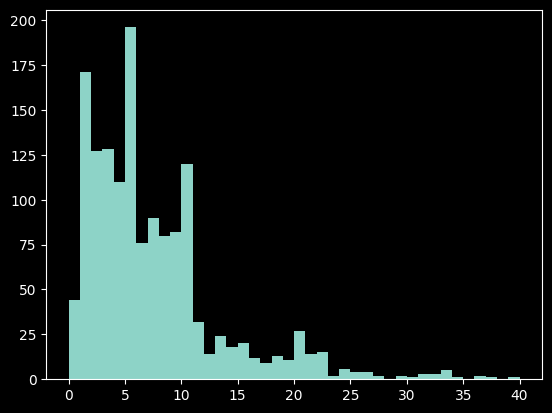

In [21]:
# If you are **not** using cudf and just regular pandas, then the commented code below will work
#attrition_df['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
#plt.show()

# If you are using cudf, then you can make a histogram this way
plt.hist(attrition_df['YearsAtCompany'], bins=np.arange(0, 41, 1))
plt.show()

---
- Sample `444` employees from `attrition_df` weighted by the `YearsAtCompany` column
- Use seed `2025`
- Plot the weighted sample of the `YearsAtCompany` column from `attrition_df_pd`* as a histogram with width equal to `1`, ranging from `0` to `40`
- Make sure to show the result &#128517;
- *Unfortunately, at the time of creating this notebook, there are problems with doing weighted sampling in cudf, so we will use pandas here exclusively, thus we will create a new DataFrame variable called `attrition_df_pd`
- **<u>NOTE</u>**: if you are only using pandas you do **not** need to reimport pandas nor create the new DataFrame `attrtition_df_pd`

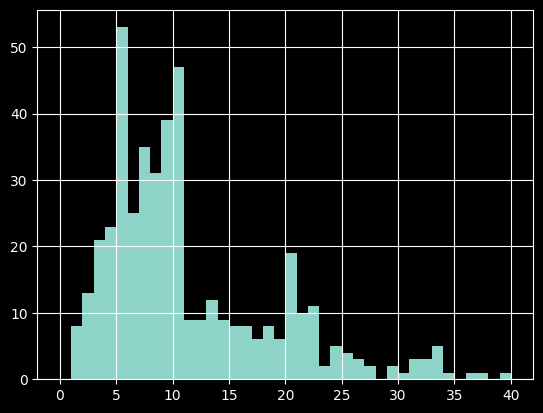

In [13]:
import pandas as pd
attrition_df_pd = pd.read_parquet('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/sampling/attrition.parquet')
attrition_weighted = attrition_df_pd.sample(n=444, weights='YearsAtCompany', random_state=2025)
attrition_weighted['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

- Nice!
- Notice how the weighted sample graph skews towards the right vs the non-weighted graph we made before

---

## **Cluster Sampling**

---
- Stratified sampling requires all subgroups to be used, but this may not be the best route if gathering data for every subgroup is extremely difficult/expensive; this is where cluster sampling can help
- Cluster sampling is a two-stage sampling technique that is closely related to stratified sampling. First, you randomly sample which subgroups to include in the sample, then randomly sample rows within each subgroup.

---
#### **<u>Stratified Sampling vs. Cluster Sampling</u>**
- **Stratified Sampling**
    - Splits population into subgroups
    - Then uses simple random sampling on every subgroup
- **Cluster Sampling**
    - Uses simple random sampling to select some subgroups
    - Then uses simple random sampling on only those selected subgroups

---

###  &nbsp;&nbsp;&nbsp;&nbsp; • Exercise

---
- Create a list of the unique values in the `JobRole` column of `attrition_df` and assign to `job_roles`
- Randomly sample `6` roles from `job_roles_sample`
- Print the results

In [4]:
# use this if you are **not** using cudf
#job_roles = list(attrition_df['JobRole'].unique())
#job_roles_sample = random.sample(job_roles, k=6)
#print(job_roles_sample)

# use this if you are using cudf
job_roles = attrition_df['JobRole'].to_pandas().unique().tolist()
job_roles_sample = random.sample(job_roles, k=6)
print(job_roles_sample)

['Manager', 'Research_Director', 'Healthcare_Representative', 'Research_Scientist', 'Human_Resources', 'Laboratory_Technician']


 ---
  - Select rows with `job_roles_sample`, then filter for rows where values in the `JobRole` column are roles in the `job_roles_sample` list and assign selection to `job_roles_selected` and filtered to `attrition_filtered`
- Remove any unused categories from the filtered DataFrame (NOTE: ensure the `JobRole` column is of type `category`)
- Randomly sample `13` employees from `attrition_filtered`and assign to `attrition_cluster`
- Use seed `2025`
- Print the results

In [10]:
# Select
job_roles_selected = attrition_df['JobRole'].isin(job_roles_sample)
# Filter
attrition_filtered = attrition_df[job_roles_selected]
# Remove categories
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].astype('category')
# in pandas you can use this if you want to remove unused categories; however, see "# Random sampling" below for a simpler way
#attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Random sampling---NOTE: use "observed=True" in the ".groupby()" method to ignore unused categories
attrition_cluster = attrition_filtered.groupby('JobRole', observed=True).sample(n=13, random_state=2025)
print(attrition_cluster)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
562    40        0.0  Travel_Frequently        791  Research_Development   
407    29        0.0  Travel_Frequently        995  Research_Development   
867    35        0.0      Travel_Rarely        670  Research_Development   
1130   35        0.0         Non-Travel       1225  Research_Development   
1104   38        0.0      Travel_Rarely        833  Research_Development   
...   ...        ...                ...        ...                   ...   
420    27        0.0      Travel_Rarely       1054  Research_Development   
916    35        0.0      Travel_Rarely       1395  Research_Development   
371    25        0.0      Travel_Rarely        180  Research_Development   
195    31        1.0         Non-Travel        335  Research_Development   
372    35        0.0      Travel_Rarely       1343  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
562    